In [42]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [2]:
all_data = sns.load_dataset('penguins')
print(all_data.size)
print(all_data.shape)

2408
(344, 7)


In [3]:
species_distinct = all_data['species'].unique()
print(species_distinct)

['Adelie' 'Chinstrap' 'Gentoo']


In [4]:
req_data = all_data[all_data['species'].isin(['Adelie', 'Gentoo'])]
print(req_data.size)
print(req_data.shape)

1932
(276, 7)


In [5]:
req_data.dropna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [6]:
req_data = pd.get_dummies(req_data, columns=['sex', 'island'], drop_first=True)

In [8]:
req_data.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_Male', 'island_Dream', 'island_Torgersen'],
      dtype='object')

In [16]:
req_data = req_data.dropna()

In [17]:
X = req_data[['island_Dream', 'island_Torgersen', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_Male']]
y = req_data['species']
y = y.map({'Adelie':0, 'Gentoo':1})

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

In [22]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

In [23]:
print(acc_nb)
print(acc_lr)

1.0
1.0


In [24]:
cf_nb = confusion_matrix(y_test, y_pred_nb)
cf_lr = confusion_matrix(y_test, y_pred_lr)
print(cf_nb)
print(cf_lr)

[[30  0]
 [ 0 25]]
[[30  0]
 [ 0 25]]


In [25]:
cr_nb = classification_report(y_test, y_pred_nb)
cr_lr = classification_report(y_test, y_pred_lr)
print(cr_nb)
print(cr_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55



In [29]:
y_prob_nb_test = nb.predict_proba(X_test)[:, 1]
y_prob_lr_test = lr.predict_proba(X_test)[:, 1]
y_prob_nb_train = nb.predict_proba(X_train)[:, 1]
y_prob_lr_train = lr.predict_proba(X_train)[:, 1]
auc_nb_train = roc_auc_score(y_train, y_prob_nb_train)
auc_nb_test = roc_auc_score(y_test, y_prob_nb_test)
auc_lr_train = roc_auc_score(y_train, y_prob_lr_train)
auc_lr_test = roc_auc_score(y_test, y_prob_lr_test)

In [31]:
print("AUC (NB) - Train:", auc_nb_train)
print("AUC (NB) - Test:", auc_nb_test)
print("AUC (LR) - Train:", auc_lr_train)
print("AUC (LR) - Test:", auc_lr_test)

AUC (NB) - Train: 1.0
AUC (NB) - Test: 1.0
AUC (LR) - Train: 1.0
AUC (LR) - Test: 1.0


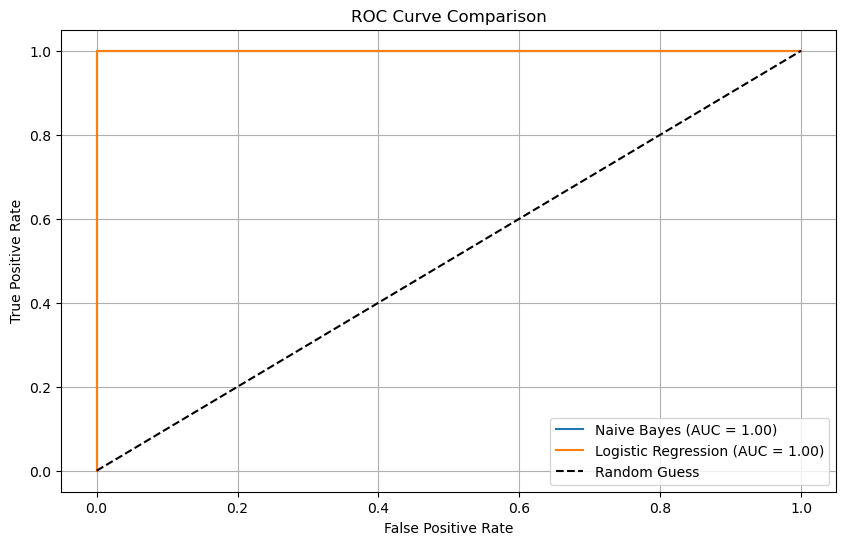

In [33]:
plt.figure(figsize=(10, 6))
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb_test)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb_test:.2f})")
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr_test)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr_test:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [34]:
y_prob_nb_test = nb.predict_proba(X_test)[:, 1]
y_prob_lr_test = lr.predict_proba(X_test)[:, 1]

In [35]:
def compute_lift_gain(y_true, y_prob, num_deciles=10):
    df = pd.DataFrame({'Actual': y_true, 'Probability': y_prob})
    df['Decile'] = pd.qcut(df['Probability'], num_deciles, labels=range(1, num_deciles + 1))
    grouped = df.groupby('Decile').agg(
        Positives=('Actual', 'sum'),
        Count=('Actual', 'count')
    ).sort_index(ascending=False)
    grouped['Cumulative Positives'] = grouped['Positives'].cumsum()
    grouped['Cumulative Percentage'] = grouped['Cumulative Positives'] / df['Actual'].sum() * 100
    grouped['Lift'] = grouped['Positives'] / grouped['Count'] / (df['Actual'].sum() / len(df))
    return grouped

In [36]:
lift_gain_nb = compute_lift_gain(y_test, y_prob_nb_test)
lift_gain_lr = compute_lift_gain(y_test, y_prob_lr_test)

C:\Users\rahul\AppData\Local\Temp\ipykernel_39632\1523362963.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Decile').agg(
C:\Users\rahul\AppData\Local\Temp\ipykernel_39632\1523362963.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Decile').agg(


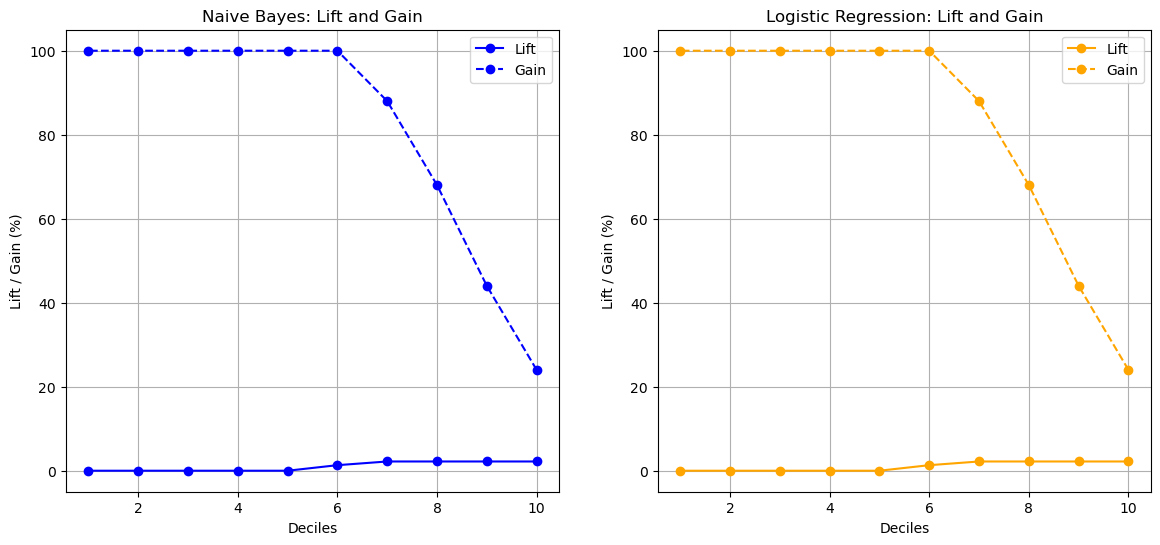

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

axes[0].plot(lift_gain_nb.index, lift_gain_nb['Lift'], label='Lift', color='blue', marker='o')
axes[0].plot(lift_gain_nb.index, lift_gain_nb['Cumulative Percentage'], label='Gain', color='blue', linestyle='--', marker='o')
axes[0].set_title("Naive Bayes: Lift and Gain")
axes[0].set_xlabel("Deciles")
axes[0].set_ylabel("Lift / Gain (%)")
axes[0].legend(loc="best")
axes[0].grid()

axes[1].plot(lift_gain_lr.index, lift_gain_lr['Lift'], label='Lift', color='orange', marker='o')
axes[1].plot(lift_gain_lr.index, lift_gain_lr['Cumulative Percentage'], label='Gain', color='orange', linestyle='--', marker='o')
axes[1].set_title("Logistic Regression: Lift and Gain")
axes[1].set_xlabel("Deciles")
axes[1].set_ylabel("Lift / Gain (%)")
axes[1].legend(loc="best")
axes[1].grid()